# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
# Libraries
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats

# Show all columns in pandas
pd.set_option('display.max_columns', None)

# Remove warnings (not necessary)
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn import linear_model

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
# Your code here.
student_data = pd.DataFrame({'Tardies': (10, 1, 5, 9, 4, 2, 9, 6, 0, 3), 'Age': (17, 51, 27, 21, 36, 48, 19, 26, 54, 30)})

Draw a dispersion diagram (scatter plot) for the data.

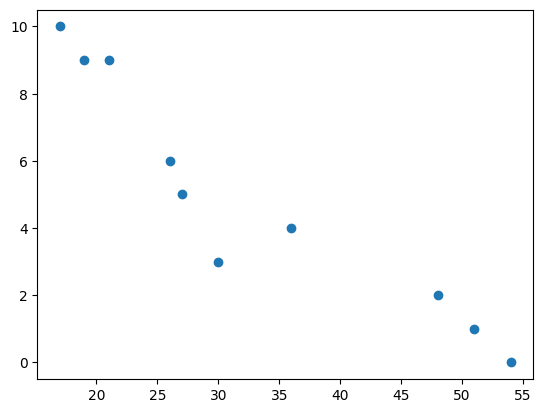

In [21]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
# There appears to be a downward trend, meaning there is likely a correlation between increased age and decreased tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.
#correlation:
print(student_data.corr(numeric_only=True))
# This shows that there is a strong negative correlation between the two variables, meaning that as one variable increases, the other decreases

#covariance:
print(np.cov(student_data.Age, student_data.Tardies))
# This shows again that there is a negative association between the two variables, but it also shows the degree to which they are negatively correlated. In this case, there is a covariance of -45

          Tardies       Age
Tardies  1.000000 -0.939163
Age     -0.939163  1.000000
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
model = linear_model.LinearRegression()

In [22]:
X = student_data.drop('Tardies', axis=1)
y = student_data['Tardies']

In [23]:
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 12.888803363135771
Coefficient: [-0.24282077]


In [24]:
regression_line = result.intercept_ + student_data.Age * result.coef_

Plot your regression model on your scatter plot.

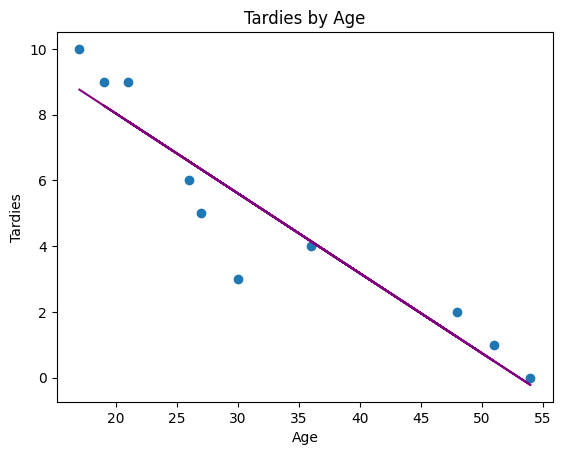

In [25]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.plot(student_data.Age, regression_line, c='purple')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Tardies by Age')
plt.show()

In [26]:
model.score(X, y)

0.8820265558250109

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
# The model strongly suggests that the older a student is, the fewer tardies they will have. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

In [28]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Your response here. 
cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles = vehicles[cols]

<Axes: >

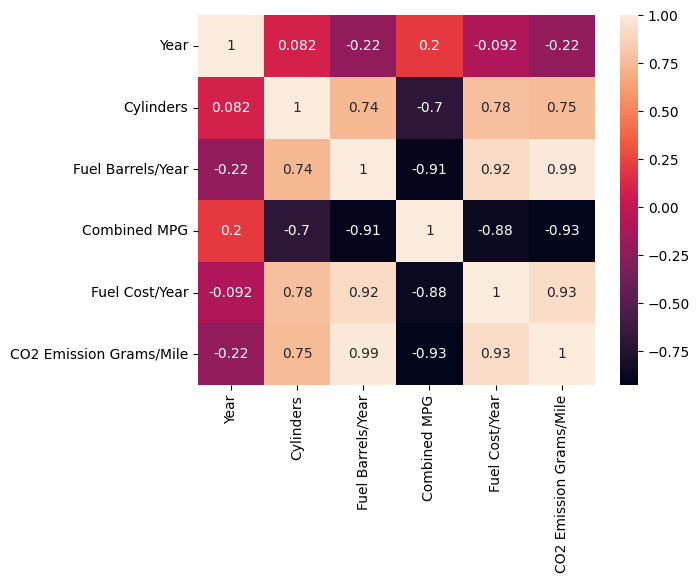

In [31]:
vehicles_corr = vehicles.corr()
sns.heatmap(vehicles_corr, annot=True)

# It seems as though Fuel Barrels/Year, Fuel Cost/Year, and Combined MPG are the best indicators of CO2 emissions, with cylinders being slightly less indicative and Year being the least helpful

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
# Your response here. 
# Using multiple linear regression

In [34]:
from sklearn.preprocessing import StandardScaler

In [44]:
vehicles_scaled = pd.DataFrame(StandardScaler().fit_transform(vehicles), columns=vehicles.columns)

In [45]:
X = vehicles_scaled.drop('CO2 Emission Grams/Mile', axis=1)
y = vehicles_scaled['CO2 Emission Grams/Mile']

In [46]:
model = linear_model.LinearRegression()
result = model.fit(X, y)

In [47]:
result.score(X, y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 
# Have a very R2 score which means the included variables allow for very accurate prediction of CO2 emissions of a given vehicle
# The most important variables are those listed aboved because of their high correlation
# Can conclude that CO2 emissions are largely determined by fuel cost and usage

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [50]:
# Your code here.
party_people = pd.DataFrame({'People Invited': (1, 3, 4, 6, 8, 9, 11, 14), 'People Attended': (1, 2, 4, 4, 5, 7, 8, 13)})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [54]:
model = linear_model.LinearRegression()
X = party_people.drop('People Attended', axis=1)
y = party_people['People Attended']
result = model.fit(X, y)
regression_line = result.intercept_ + party_people['People Invited'] * result.coef_

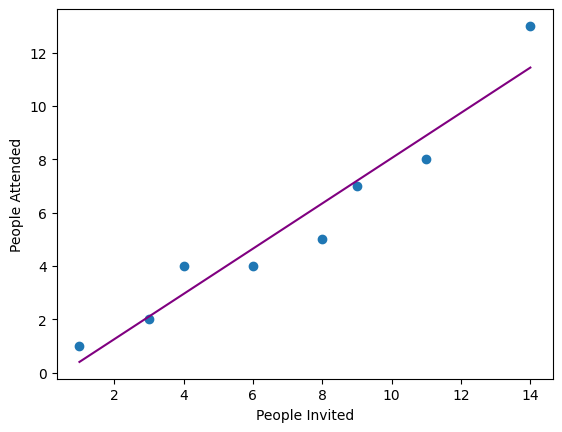

In [57]:
# Your code here.
plt.scatter(party_people['People Invited'], party_people['People Attended'])
plt.plot(party_people['People Invited'], regression_line, c='purple')
plt.xlabel('People Invited')
plt.ylabel('People Attended')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [58]:
model.score(X, y)

0.9316696375519905

In [16]:
# Your response here. 
# The linear regression score is high, meaning that the percentage of people unable to attend remains consistent regardless of how many people are invited
# The 2 variables are positively correlated

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [62]:
# Your response here. 
# The last point appears to be an outlier
party_person = pd.DataFrame({'People Invited': (1, 3, 4, 6, 8, 9, 11), 'People Attended': (1, 2, 4, 4, 5, 7, 8)})

In [63]:
model = linear_model.LinearRegression()
X = party_person.drop('People Attended', axis=1)
y = party_person['People Attended']
result = model.fit(X, y)
regression_line = result.intercept_ + party_person['People Invited'] * result.coef_

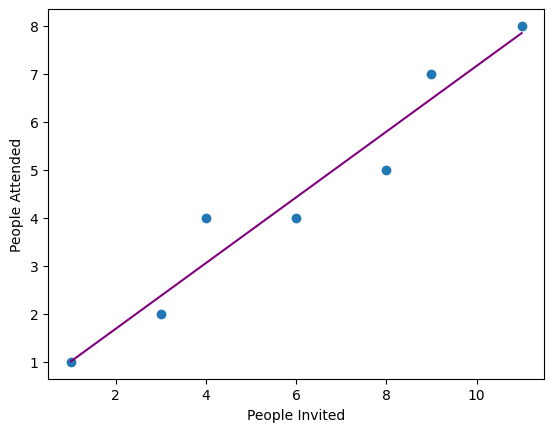

In [64]:
plt.scatter(party_person['People Invited'], party_person['People Attended'])
plt.plot(party_person['People Invited'], regression_line, c='purple')
plt.xlabel('People Invited')
plt.ylabel('People Attended')
plt.show()

In [65]:
model.score(X, y)

0.9433811802232855

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here. 
# The R2 score is now slightly higher (.943 vs .931)